In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

def magic_f(xs):
    return [-0.7*x**3 - 0.5*x**2 + 0.3*x + 0.9 for x in xs]

# Applied Machine Learning

### Sergey Lisitsyn

# Scope

- Essential machine learning methods
- Structuring machine learning projects
- Industrial/enterprise/... practices of ML

# Out of scope

- Other aspects of working with data
- Classic statistical things
- Advanced things like GANs (but overview)

# Grading

- 60% homeworks
- 40% exam
- Details to be clarified during the next weeks (sorry!)

# Books to consider

- [A Course in Machine Learning](http://ciml.info/) (Hal Daumé III) *gives you a great overview of ML*
- [Elements of Statistical Learning](http://web.stanford.edu/~hastie/ElemStatLearn/) (Hastie et al) *serves as a reference book*
- [Deep Learning](http://www.deeplearningbook.org) (Goodfellow et al) *gets you into deep learning*
- [Probabilistic Programming and Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/) *helps you to become bayesian*

# MOOCs to consider

- [Deep Learning](https://www.coursera.org/specializations/deep-learning), esp. *Structuring Machine Learning Projects*
- [Data Science](https://www.coursera.org/specializations/jhu-data-science), esp. *Reproducible Science*
- [Advanced Machine Learning](https://www.coursera.org/specializations/aml)

# Programming in ML

- You've got to code to be successful in ML
- No platform user ever won a Kaggle
- We will use Python and its powerful libraries

# Why Python?

- De-facto standard language of data science
- Easy to learn and versatile
- Used both in production systems and by researchers
- A lot of libraries around
- Easy to extend with native libraries

# Libraries
The best way to install libraries is to use **conda**

In this course we're going to use sklearn (scikit-learn), XGBoost, Keras (a part of Tensorflow now), and a few more libraries

In [2]:
import sklearn
import xgboost
import keras

Using TensorFlow backend.


# Why not ..

- **R?** Python is more versatile and has more important libraries
- **Platforms?** They are good to sell and promote but seldom used by anyone
- **Java/..?** Too verbose for data science

# Machine learning

- Studies ability to learn without being explicitly programmed
- In ML, the task is usually to transform amounts of data (the past) into a prediction procedure (the future)
- Such a task is much simpler than general AI
- Yet it never gets solved

# No free lunch

- The *no free lunch* theorem basically states that across all possible problems, all the algorithms are equivalent
- When working with images or audio, deep learning is the king. 
- When working with typical Excel-like data, decision tree boosting fits best

*We have to know how to choose a proper method for your problem*

# Formal definition

- $X$ is a space of possible inputs (features, covariates, ...)
- $Y$ is a space of possible outputs (labels, targets, ...)
- There exists a function $f: X \to Y$ that we don't ever get to know
- We know *some past* (training examples) $(x_1, f(x_1)), (x_2, f(x_2)), ...$
- We want to find $\hat f$ quite similar to $f$

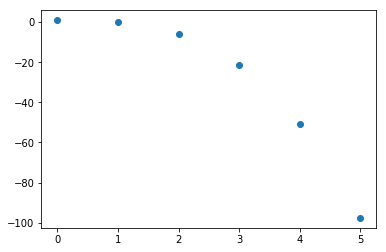

In [11]:
x = [0, 1, 2, 3, 4, 5]
y = magic_f(x)
plt.scatter(x, y);

# Learning problems

- Regression $Y = \mathbb{R}$: predict housing prices
- Classification (binary and multiclass) $Y = \mathbb{N}$: predict email category
- Ranking $Y = \mathbb{R}$: rank search engine results

*What we do first is try to cast our problem to one of the known learning problems.*

# Loss function

the (only) difference between learning problems

Let's define a squared loss (what is the problem it fits?)

In [4]:
def loss(prediction, target):
    return (prediction - target)**2

loss(50, 53.25)

10.5625

# Empirical risk

We know just a limited set of values of $f$ so we have to use them to compare $\hat f$

Empirical risk is average loss (error) on the given (training) data

In [14]:
def empirical_risk(predictions, targets):
    return np.mean((np.array(predictions) - np.array(targets))**2)

# Prediction function

the main difference between various algorithms

We have to define $\hat f$. It might be a decision tree, a linear function, a neural network... or, a polynomial:

In [23]:
def predict(parameters, inputs):
    a, b, c, d = parameters
    x = inputs
    return a*x**3 + b*x**2 + c*x + d

# Parameters

$\hat f$ is a family of functions. To use it we have to find its **parameters**. 

Some parameters lead to high empirical risk, some do not.

# Optimization

we can cast our problem to optimization. We minimize objective (empirical risk) that is a function of parameters.

This way we find the best parameter setting.

In [24]:
objective = lambda parameters: empirical_risk([predict(parameters, x_i) for x_i in x], y)

best_parameters = opt.fmin(objective, x0=[1,1,1,1])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 361
         Function evaluations: 608


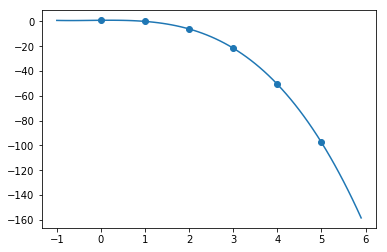

In [22]:
xs = np.arange(-1, 6, 0.1)
ys = [predict(best_parameters, x_i) for x_i in xs]

plt.scatter(x, y)
plt.plot(xs, ys);

# Sounds like approximation/interpolation?

- The thing we just did could be done in 17th century
- Totally different in high-dimensional spaces
- $\hat f$ can get seriously complex (like a neural network)

# Recap

- Identify the problem
- Choose a classifier family
- Optimize to find parameters (fit, train, ..)

# Next classes

- 25.01 Linear methods for classification and regression, handling sparse data
- 3.03 Decision trees and ensembles